# Load our cleaned data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

data = pd.read_csv(r'..\data\processed\cleaned-data.csv')
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-28 07:35:20+00:00,2016-05-04 00:00:00+00:00,76,FORTE SÃO JOÃO,0,0,0,0,1,1,No
1,F,2016-05-05 07:17:25+00:00,2016-05-11 00:00:00+00:00,67,ROMÃO,0,0,0,0,1,1,No
2,F,2016-05-12 07:31:37+00:00,2016-05-18 00:00:00+00:00,39,ROMÃO,0,0,0,0,1,0,No
3,M,2016-05-19 08:12:01+00:00,2016-05-25 00:00:00+00:00,76,FORTE SÃO JOÃO,0,1,0,0,1,1,Yes
4,F,2016-04-28 07:35:33+00:00,2016-05-04 00:00:00+00:00,43,BONFIM,1,0,0,0,1,1,No


In [68]:
data.shape

(97286, 16)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97286 entries, 0 to 97285
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Gender              97286 non-null  object             
 1   ScheduledDay        97286 non-null  datetime64[ns, UTC]
 2   AppointmentDay      97286 non-null  datetime64[ns, UTC]
 3   Age                 97286 non-null  int64              
 4   Neighbourhood       97286 non-null  object             
 5   Scholarship         97286 non-null  int64              
 6   Hipertension        97286 non-null  int64              
 7   Diabetes            97286 non-null  int64              
 8   Alcoholism          97286 non-null  int64              
 9   Handcap             97286 non-null  int64              
 10  SMS_received        97286 non-null  int64              
 11  No-show             97286 non-null  object             
 12  WaitingDays         97286 non-nu

In [70]:
data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingDays,WaitingTime
count,97286.000000,97286.000000,97286.000000,97286.000000,97286.000000,97286.000000,97286.000000,97286.000000,97286.000000
mean,38.222529,0.102440,0.204120,0.074975,0.028236,0.979123,0.323633,9.348437,9.348437
std,22.554251,0.303228,0.403059,0.263352,0.165648,0.142972,0.467864,15.461865,15.461865
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,-7.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000,14.000000
max,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000,178.000000


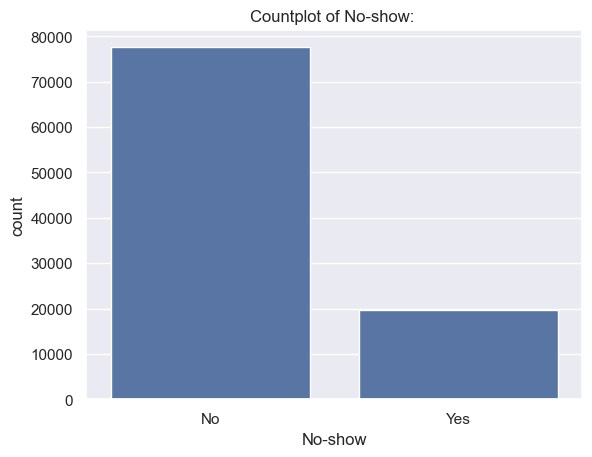

In [8]:
sns.countplot(x=data['No-show'])
plt.title("Countplot of No-show: ")
plt.show()

- So we have more patients who take appointments on time compared to others patients who are not taking appointments at right time.

<Axes: xlabel='Gender', ylabel='count'>

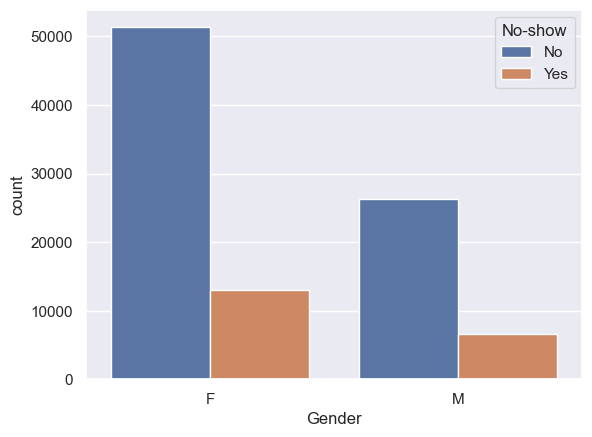

In [9]:
sns.countplot(data, x='Gender', hue='No-show')

- As you can see both men and women are equally responsible for not taking the appointment on time.

<Axes: xlabel='Scholarship', ylabel='count'>

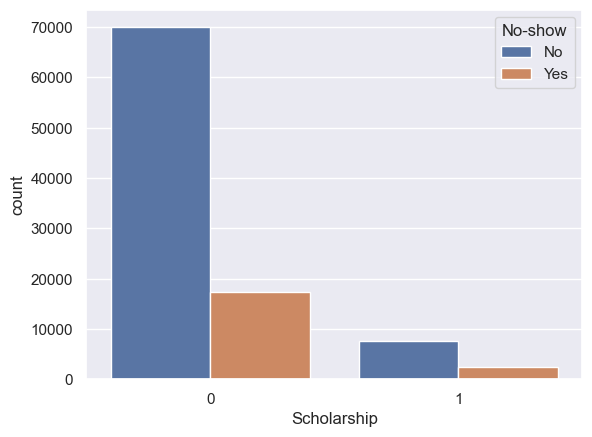

In [12]:
sns.countplot(data, x='Scholarship', hue='No-show')

- So, most of the patients don't have any scholarship from the government, so the patients who have scholarship from the government have more chances to get the appointment on time.

<Axes: xlabel='Diabetes', ylabel='count'>

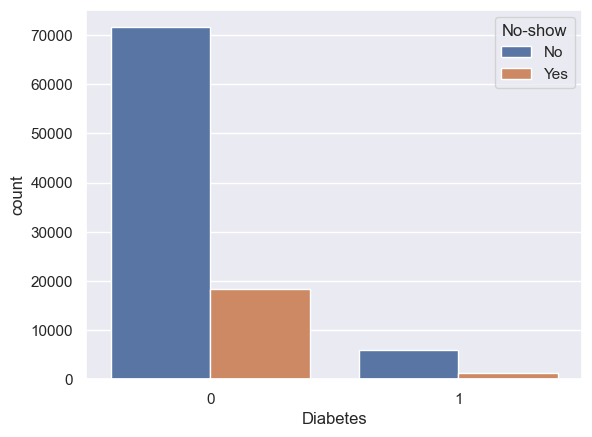

In [14]:
sns.countplot(data, x='Diabetes', hue='No-show')

- So we can clearly see that if a patient has **diabetes**, he or she is `more likely` to attend an appointment on time.

<Axes: xlabel='Alcoholism', ylabel='count'>

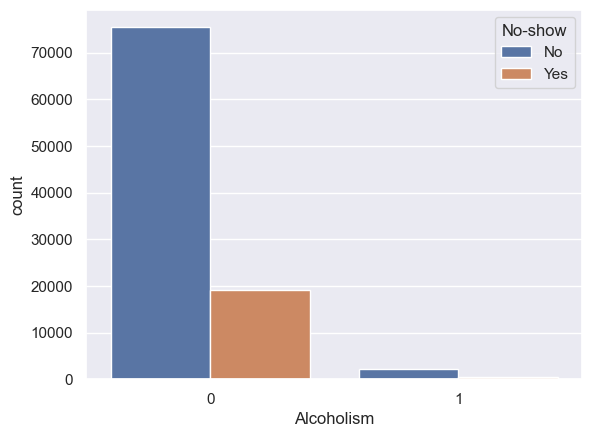

In [15]:
sns.countplot(data, x='Alcoholism', hue='No-show')

<Axes: xlabel='SMS_received', ylabel='count'>

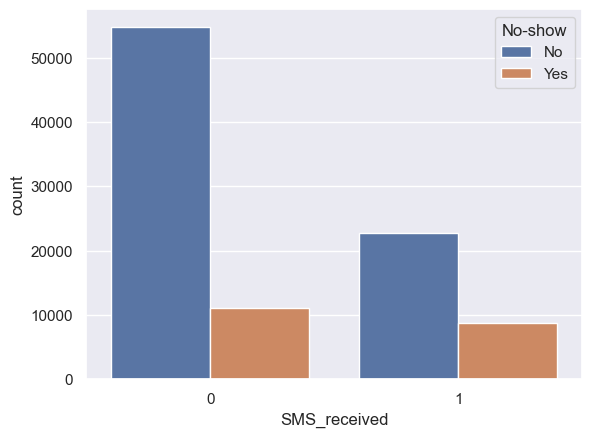

In [16]:
sns.countplot(data, x='SMS_received', hue='No-show')

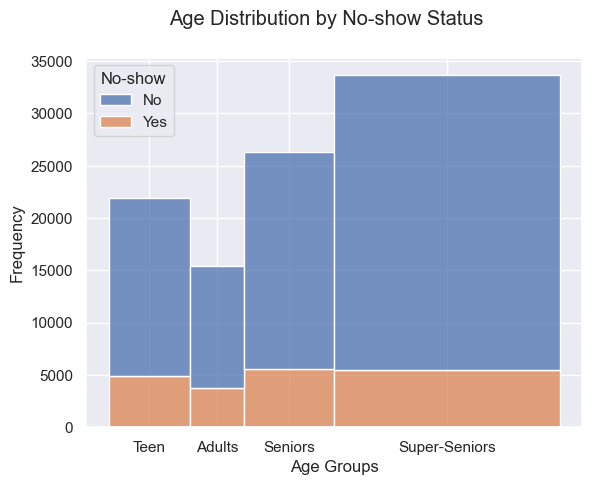

In [28]:
sns.histplot(data=data, x="Age", bins=[0, 18, 30, 50, 100], hue='No-show', multiple='stack')
plt.xticks([9, 24, 40, 75], ['Teen', 'Adults', 'Seniors', 'Super-Seniors'])
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.suptitle("Age Distribution by No-show Status") 
plt.show()

- So as you can see that, `super-senior` are more aware of time.

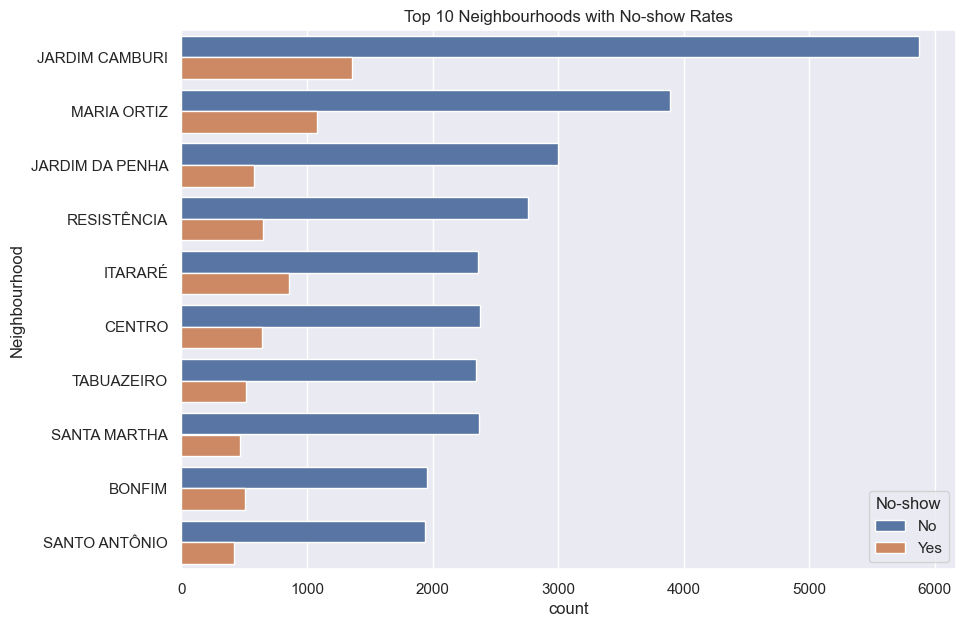

In [31]:
plt.figure(figsize=(10,7))
order = data['Neighbourhood'].value_counts().index
sns.countplot(data=data, y='Neighbourhood', hue='No-show', order=order[:10])
plt.title("Top 10 Neighbourhoods with No-show Rates")
plt.show()

In [32]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['WaitingDays'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

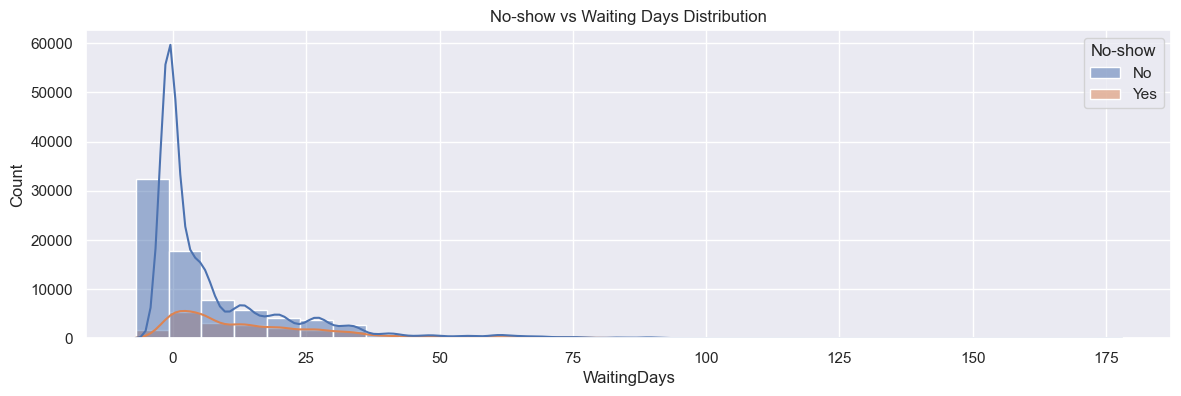

In [37]:
plt.figure(figsize=(14,4))
sns.histplot(data=data, x='WaitingDays', hue='No-show', bins=30, kde=True)
plt.title("No-show vs Waiting Days Distribution")
plt.show()

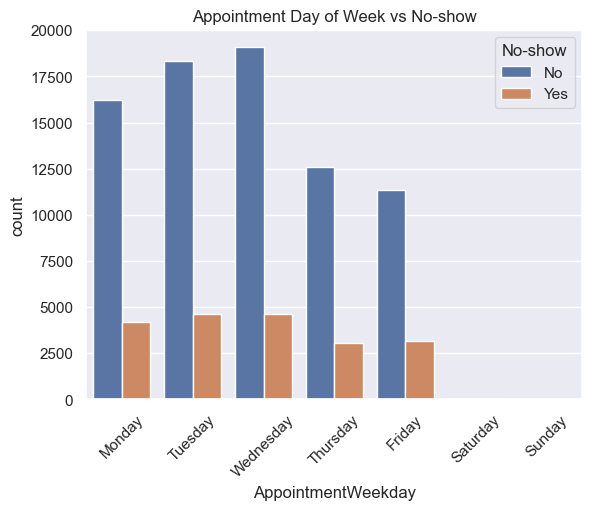

In [39]:
data['AppointmentWeekday'] = data['AppointmentDay'].dt.day_name()

sns.countplot(data=data, x='AppointmentWeekday', hue='No-show',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=45)
plt.title("Appointment Day of Week vs No-show")
plt.show()

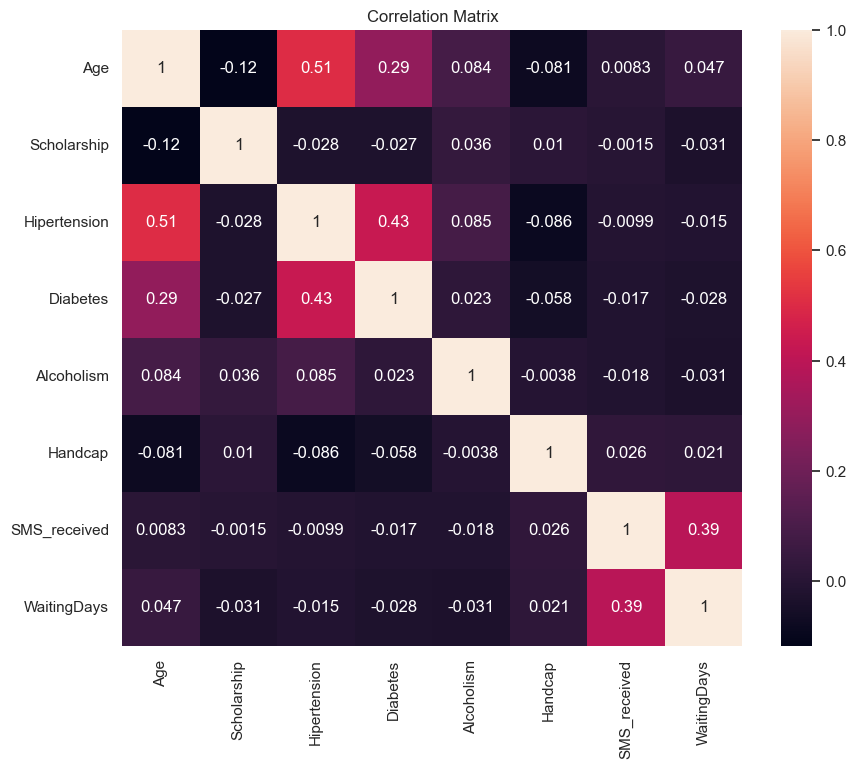

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, )
plt.title("Correlation Matrix")
plt.show()

## User behevior

<Axes: xlabel='Diabetes', ylabel='count'>

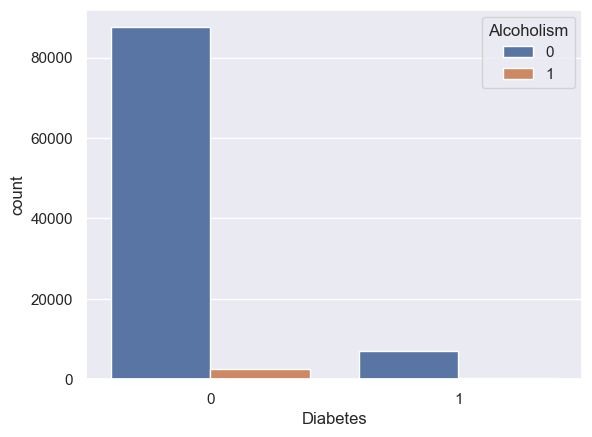

In [49]:
sns.countplot(data, x='Diabetes', hue='Alcoholism')

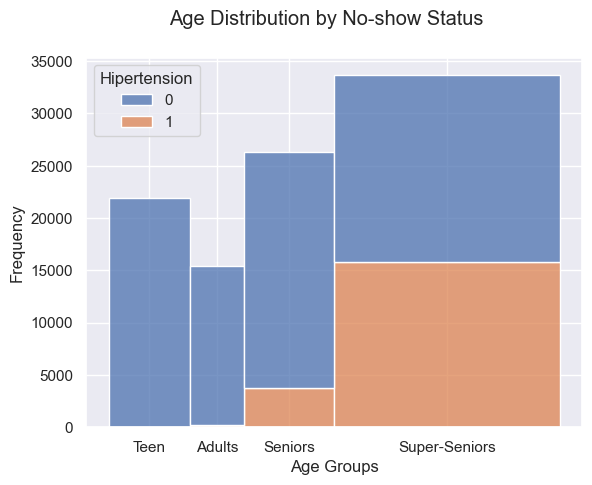

In [51]:
sns.histplot(data=data, x="Age", bins=[0, 18, 30, 50, 100], hue='Hipertension', multiple='stack')
plt.xticks([9, 24, 40, 75], ['Teen', 'Adults', 'Seniors', 'Super-Seniors'])
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.suptitle("Age Distribution by No-show Status") 
plt.show()

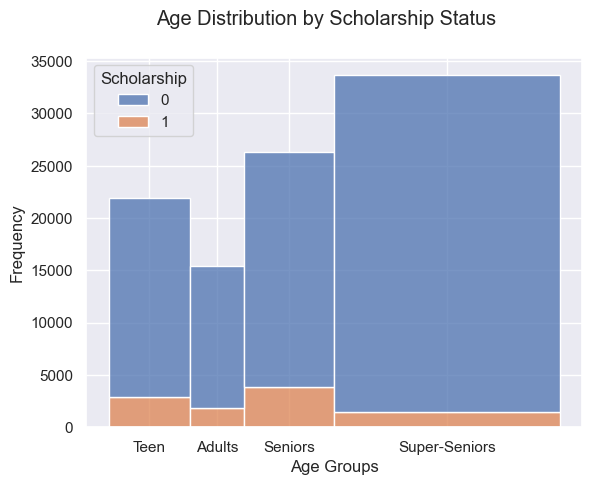

In [56]:
sns.histplot(data=data, x="Age", bins=[0, 18, 30, 50, 100], hue='Scholarship', multiple='stack')
plt.xticks([9, 24, 40, 75], ['Teen', 'Adults', 'Seniors', 'Super-Seniors'])
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.suptitle("Age Distribution by Scholarship Status") 
plt.show()

In [66]:
bins = [0, 18, 30, 50, 100]
labels = ['Teens', 'Adults', 'Seniors', 'Super-Seniors']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

<Axes: xlabel='AgeGroup', ylabel='WaitingTime'>

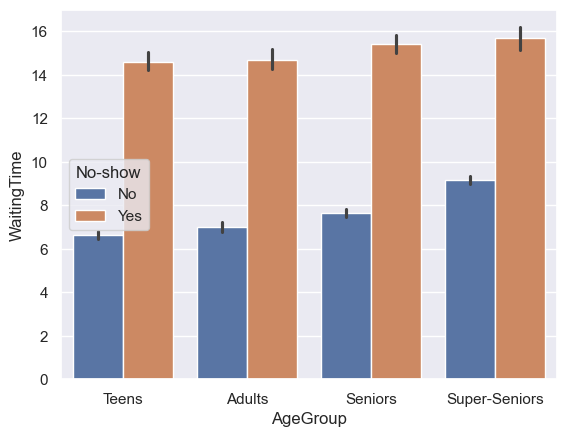

In [67]:
sns.barplot(data=data, x='AgeGroup', y='WaitingTime', hue='No-show', estimator='mean')